In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
!pip install kaggle 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Connect with Kaggle

In [14]:
! mkdir ~/.kaggle


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [15]:
! cp kaggle.json ~/.kaggle/

In [16]:
! chmod 600 ~/.kaggle/kaggle.json

### Downloading the Dataset From Kaggle

In [17]:
/

()

In [18]:
! kaggle datasets download -d iamsouravbanerjee/animal-image-dataset-90-different-animals


 99% 650M/656M [00:06<00:00, 115MB/s] 
100% 656M/656M [00:06<00:00, 107MB/s]


In [19]:
! unzip /content/animal-image-dataset-90-different-animals.zip

Streaming output truncated to the last 5000 lines.
  inflating: animals/animals/bison/73b10839bc.jpg  
  inflating: animals/animals/bison/74dc1dd32a.jpg  
  inflating: animals/animals/bison/75ab166a7d.jpg  
  inflating: animals/animals/bison/79e1610d01.jpg  
  inflating: animals/animals/bison/7ba5eee91f.jpg  
  inflating: animals/animals/bison/7d214aab4b.jpg  
  inflating: animals/animals/bison/7f2ef9ab03.jpg  
  inflating: animals/animals/bison/82ec723a4f.jpg  
  inflating: animals/animals/bison/85e145af6c.jpg  
  inflating: animals/animals/bison/862e2c6379.jpg  
  inflating: animals/animals/bison/87a5c700ad.jpg  
  inflating: animals/animals/bison/88b723ce90.jpg  
  inflating: animals/animals/bison/8c3af742c3.jpg  
  inflating: animals/animals/bison/8e34044b98.jpg  
  inflating: animals/animals/bison/8e6adbdc40.jpg  
  inflating: animals/animals/bison/8fce80d5ba.jpg  
  inflating: animals/animals/bison/961a895686.jpg  
  inflating: animals/animals/bison/984a5b583d.jpg  
  inflating: 

### Installing Dependencies

In [19]:
!pip install fastai 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
from fastai.vision.all import *

In [21]:
import torch.optim as optim

In [22]:
img_path = Path("/content/animals/animals")
img_fnames = get_image_files(img_path)


dls = ImageDataLoaders.from_path_func(path=img_path, 
                                      fnames=img_fnames,
                                      label_func=parent_label,
                                      item_tfms=RandomResizedCrop(460, min_scale=0.3),
                                      batch_tfms=[*aug_transforms(size=224),
                                                  Normalize.from_stats(*imagenet_stats)])


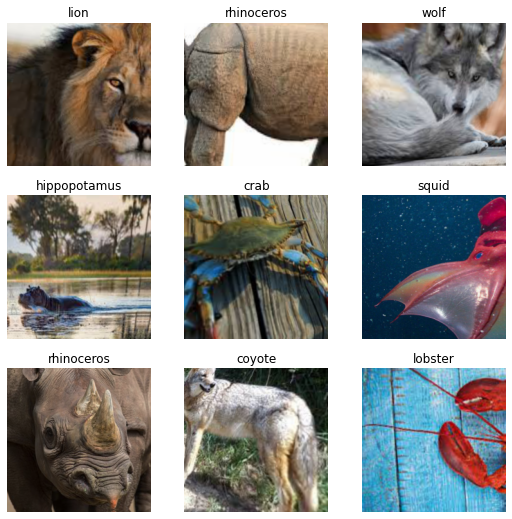

In [23]:
dls.show_batch()

In [24]:
learn = cnn_learner(dls, densenet121, 
                    loss_func=nn.CrossEntropyLoss(),
                    metrics=accuracy,
                    path="./")

/usr/local/lib/python3.9/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121

  0%|          | 0.00/30.8M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0010000000474974513)

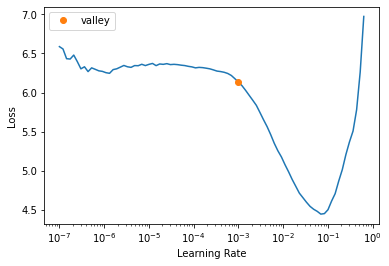

In [25]:
learn.lr_find()

In [26]:
learn.fit_one_cycle(20, 0.0010000000474974513)

epoch,train_loss,valid_loss,accuracy,time
0,5.617015,3.853459,0.125926,01:56
1,3.632617,1.197787,0.706481,01:58
2,1.950075,0.570639,0.844444,01:55
3,1.171708,0.432057,0.883333,01:57
4,0.769337,0.401855,0.877778,01:56
5,0.566377,0.374942,0.891667,01:56
6,0.493729,0.347084,0.894444,01:55
7,0.415004,0.321283,0.912037,01:57
8,0.334766,0.327672,0.907407,01:58
9,0.300421,0.284353,0.920370,01:57
